# 构建环境

## 导入常用包

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns


import missingno as msno    # 查看数据完成性并可视化
import pandas_profiling     # 自动生成基础报告


import warnings
warnings.filterwarnings('ignore') 

## 安装模块

In [4]:
! pip install statsmodels

# 数据读存

## pandas库读取

In [2]:
df = pd.read_csv('listings.csv',usecols=[1,2,7,10,28])  # 读取csv格式固定列数据
# df = pd.read_csv("redcard.csv.gz", compression='gzip') # 直接读取
#df = pd.read_csv('listings.csv')
#df = pd.read_excel('listings.xlsx')
# encoding='utf-8' 

data = pd.read_table('文件名',header=None,encoding='gb2312',sep=',',index_col=0)    # 读取text格式数据


## 读取文本数据

In [ ]:
# 定义数据文件
file_name = 'd:/python/text/'
# 获取文件对象
file_object = open(file_name)
# 读取文件内容
read_data = file_object.read()
print(read_data)

## 读取多个数据

In [ ]:
# 读取 所有csv 文件

files_csv =[]
path = 'E:/城市空气质量/城市'
files = os.listdir(path)
files_csv = list(filter(lambda x: x[-4:]=='.csv' , files))
files_csv += files_csv

#定义一个空列表
data_list = []

#函数re.compile将正则表达式（以字符串书写的）转换为模式对象
num_filter = re.compile(r'\d+')

for file in  files_csv:
    tmp = pd.read_csv(path + "/"+file)[['date', 'hour','type','呼和浩特']]
    data_list.append(tmp)

## 创造数据

In [2]:
np.zeros((3,4)) # ones

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
np.arange(0,9,1).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [19]:
print(np.random.randint(5,size=(8,3)))
np.random.random((2,3))

[[0 1 1]
 [4 4 0]
 [2 4 3]
 [0 0 0]
 [1 2 2]
 [4 3 0]
 [0 4 3]
 [2 0 3]]


array([[0.64225552, 0.34470588, 0.94836011],
       [0.53028796, 0.75643663, 0.19859592]])

## 整合数据

In [ ]:
listname = ['PM2.5','CO_','BC_','CO2-EXCL-BF','NH3','NOX','PM10_','SO2','CO_','CO_']
for name in listname:
    path= r'2015/REASv3.2_{}_TOTAL_2015_0.25x0.25'.format(name)
    f = open(path).read()
    ff = f.replace(' ',',')
    ff = ff.replace(',,',',')
    ff = ff.replace(',,',',')
    path1 = r'2015/{}.txt'.format(name)
    fl = open(path1,'w')
    fl.write(ff)
    df = pd.read_table(path,skiprows=9,sep=',', names=['a','lon','lat','month1','month2','month3','month4','month5','month6','month7','month8','month9','month10','month11','month12'])

## 保存数据

In [7]:
df.to_csv('output.csv',index=False)

# 数据检查

## 数据预览

In [8]:
df.head()

,scrape_id,last_scraped,host_since,neighbourhood,price
0,2.020000e+13,1/2/15,4/10/13,Midtown East,$160.00
1,2.020000e+13,1/2/15,6/13/12,Hamilton Heights,$105.00
2,2.020000e+13,1/2/15,1/5/13,Bushwick,$58.00
3,2.020000e+13,1/3/15,8/11/10,West Village,$185.00
4,2.020000e+13,1/2/15,10/15/14,Chelsea,$195.00


In [10]:
df.shape

(27392, 5)

In [11]:
list(df.columns)

['scrape_id', 'last_scraped', 'host_since', 'neighbourhood', 'price']

## 查看非重复值

In [ ]:
df["风向"].unique()

data.drop_duplicates()# 去重

In [ ]:
print('Number of Unique Accomodation: ', np.unique(data['accommodates']))
for i in range(1, 17):
    print('Accommodation {}:'.format(i), len(data[data['accommodates'] == i]))

## 缺失值可视化

In [ ]:
import missingno as msno
msno.matrix(players.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

# 缺失值柱状图
msno.bar(players.sample(1000))


In [ ]:
# 缺失值之间的关系
msno.heatmap(players.sample(500),
            figsize=(16, 7),)

## 检查空值数量

In [6]:
for col in df.columns:
    print (col + ', 空值数据:', len(df[col][df[col].isnull()]))

scrape_id, 空值数据: 0
last_scraped, 空值数据: 0
host_since, 空值数据: 0
neighbourhood, 空值数据: 2027
price, 空值数据: 0


## 查找空值的行列

In [ ]:
print(df[df.isnull().T.any()])

## 基础数据报告

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(time_slice(data, '2013-2017'))

# 数据处理

## 删

### 删除有空值的行

In [7]:
df.dropna(axis=0, how='any')
#  df = df[~df['neighbourhood'].isnull()]
#  按行删除：所有数据都为空值，即删除该行
# 例子 （删除特点列的空值）
# original = len(data)
# data = data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
# print('Number of NaN values removed:', original - len(data))

,scrape_id,last_scraped,host_since,neighbourhood,price
0,2.020000e+13,1/2/15,4/10/13,Midtown East,$160.00
1,2.020000e+13,1/2/15,6/13/12,Hamilton Heights,$105.00
2,2.020000e+13,1/2/15,1/5/13,Bushwick,$58.00
3,2.020000e+13,1/3/15,8/11/10,West Village,$185.00
4,2.020000e+13,1/2/15,10/15/14,Chelsea,$195.00
...,...,...,...,...,...
27387,2.020000e+13,1/2/15,12/8/11,Kips Bay,$130.00
27388,2.020000e+13,1/2/15,4/15/13,Times Square/Theatre District,$139.00
27389,2.020000e+13,1/3/15,6/18/12,St. George,$99.00
27390,2.020000e+13,1/2/15,12/19/10,Crown Heights,$55.00


In [12]:
df.dropna()

,scrape_id,last_scraped,host_since,neighbourhood,price
0,2.020000e+13,1/2/15,4/10/13,Midtown East,$160.00
1,2.020000e+13,1/2/15,6/13/12,Hamilton Heights,$105.00
2,2.020000e+13,1/2/15,1/5/13,Bushwick,$58.00
3,2.020000e+13,1/3/15,8/11/10,West Village,$185.00
4,2.020000e+13,1/2/15,10/15/14,Chelsea,$195.00
...,...,...,...,...,...
27387,2.020000e+13,1/2/15,12/8/11,Kips Bay,$130.00
27388,2.020000e+13,1/2/15,4/15/13,Times Square/Theatre District,$139.00
27389,2.020000e+13,1/3/15,6/18/12,St. George,$99.00
27390,2.020000e+13,1/2/15,12/19/10,Crown Heights,$55.00


In [ ]:
google.isnull().any()

In [ ]:
google.isnull().sum()

### 平均值填充缺失值

In [ ]:
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)

# dataframe.ffill()   # 向前填充
# dataframe.bfill()   # 向后填充

### 插值法填充缺失值

In [ ]:
for column in list(df.columns[df.isnull().sum() > 0]):
    df[column].interpolate()  #dataframe.interpolate(method="quadratic")

In [ ]:
df2.fillna(method='ffill')

###  剔除、填充异常值

In [ ]:
da = data.values#重新赋值data
#异常值处理，将commments大于200000的数据comments设置为58
cont_clou = len(da)#获取行数
#遍历数据进行处理
for i in range(0,cont_clou):
    if(data.values[i][3]>200000):
        #print(data.values[i][3])
        da[i][3]='58'
        #print(da[i][3])

In [ ]:
print ('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print ('Number of Beds 0:', len(data[data['beds'] == 0]))
print ('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

### 去除重复值

In [ ]:
#按key去重
datacln=data.drop_duplicates("KEY")
datacln

### 删除某列

In [ ]:
df.drop(columns=['id'])

In [ ]:
#Drop rows
>>>df.drop([0, 1])
   A  B   C   D
2  8  9  10  11

In [ ]:
feature.drop([feature.columns[0]], axis=1)

In [ ]:
#删除table值为sc的那一行
df.drop(index=(df.loc[(df['table']=='sc')].index))

### 削峰模拟

In [ ]:
## 查看分位数  
df_pm25.pm25.quantile(0.90)

In [ ]:
## 削峰模拟
df_pm25.pm25[df_pm25['pm25']>48]=48
df_pm25

### 将0值替换为'No Reviews'

In [ ]:

idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist() # 找到行数
data.loc[idx_vals, 'review_scores_rating'] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace(np.nan, 'No Reviews')

## 增

### 增加一列

In [ ]:
df['成本'] = df['价格']-df['价格']*0.68

df2 = df.assign(ration = df['data1']/df['data2'])

df3 = pd.concat([titanic,classes],axis = 1)

df4 = titanic.assign(ration = classes)

### 排序并重新索引

In [ ]:
df = df.reindex(index=[])

In [ ]:
print(df.sort_values(by=['col2','col3'],ascending=False))

### 字典合并列表

In [ ]:
bj_meo_stations.values()

In [ ]:
list(bj_meo_stations.values())

In [ ]:
pd.concat(list(meo_stations.values()), axis=1)

In [ ]:
bj_meo_stations_merged = pd.concat(list(bj_meo_stations.values()), axis=1)

## 改

### 调整列的顺序

In [8]:
df = df[['scrape_id','neighbourhood','last_scraped','host_since','price']]

### 重命名列名

In [17]:
colNameDict = {
    'scrape_id':'ID',
    'neighbourhood':'邻居',
    'last_scraped':'最近收集',
    'host_since':'天气',
    'price':'价格'
}
df.rename(columns = colNameDict,inplace=True)
df.head()

#data.columns = list("abcd")  

,ID,最近收集,天气,邻居,价格
0,2.020000e+13,1/2/15,4/10/13,Midtown East,$160.00
1,2.020000e+13,1/2/15,6/13/12,Hamilton Heights,$105.00
2,2.020000e+13,1/2/15,1/5/13,Bushwick,$58.00
3,2.020000e+13,1/3/15,8/11/10,West Village,$185.00
4,2.020000e+13,1/2/15,10/15/14,Chelsea,$195.00


### 批量重命名

In [ ]:
    original_names = meo_station.columns.values.tolist()
    names_dict = {original_name: station + "_" + original_name for original_name in original_names}
    print(names_dict)

### 自己制定索引

In [ ]:
df = df.set_index('Name')
df.head()

### 更改数据格式

In [3]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [8]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
print(numeric_strings.dtype)
numeric_strings.astype(float)

|S4


array([ 1.25, -9.6 , 42.  ])

In [20]:
df['邻居']=np.where(df['邻居'] =='Midtown East', 'West Village', df['邻居'])
df['邻居']=np.where(df['邻居'] =='Hamilton Heights', 'West Village', df['邻居'])
df['邻居']=np.where(df['邻居'] =='Bushwick', 'West Village', df['邻居'])

In [1]:
# 将价格￥99转成99.0

In [10]:
df['价格'] = (df['价格'].str.replace(r'[^-+\d.]', '').astype(float))

### 分类数据转化数值

In [ ]:
# label enconding 来实现
full_df.Sex = full_df.Sex.map({'male':1,'famale':2})

# season_dict = {1:"spring",2:"summer",3:"autumn",4:"winter"}
# BikeDf.season = BikeDf.season.replace(season_dict)

# weather_dict={1:"sunday",2:"clouday",3:"snowday",4:"rainday"}
# BikeDf['weather']=BikeDf['weather'].map(weather_dict)

### 合并数据

#### merge合并

In [ ]:
c= pd.merge(df,df2,left_on='时间',right_on='时间',how = 'left')

pd.merge(D1, D2, on='id', how='left')  # 左连接
pd.merge(D1, D2, on='id', how='right') # 右连接
pd.merge(D1, D2, on='id', how='outer') # 全连接

#### concat

In [ ]:
# 列表合并
pd.concat([s1,s2,s3])#默认并集、纵向连接

#### append

### 分列

In [1]:
"2003-01-06 00:15:00".split(" ")[0] 

'2003-01-06'

### 交叉表

In [ ]:
pd.crosstab(players.rater1, players.rater2)

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pd.crosstab(players.rater1, players.rater2), cmap='Blues', annot=True, fmt='d', ax=ax)

### Lambda表达式和map函数

In [24]:
c= [1,2,3]
c

[1, 2, 3]

In [21]:
print(map(lambda x:x+1 , a))

In [22]:
a  = lambda x:x*x
b  = lambda x:x**x

In [32]:
n =[map(lambda x:x(i),[a,b]) for i in c]

In [38]:
print(str(n))

[<map object at 0x000002545803F340>, <map object at 0x000002545803F490>, <map object at 0x000002545803F550>]


In [36]:
ls=[1,2,3]
rs=map(str,ls)
print(list(rs))

['1', '2', '3']


In [29]:
map(square, [1,2,3,4,5]) 

### 分组 Vlookup

In [ ]:
df['Age'].value_counts(ascending = False,bins = 5)

In [ ]:
bins = [10,40,80]
bins_res = pd.cut(df['Age'],bins)
df['bins']=bins_res

### 数据透视表

In [ ]:
df.pivot_table(index = 'Sex',columns='Pclass',values='Fare')
example.pivot(index = 'Category',columns= 'Month',values = 'Amount')

In [ ]:
all_hour = pd.crosstab(all_data_hour.time, all_data_hour.type,values=all_data_hour['呼和浩特'],aggfunc=np.mean,margins=True)
all_hour

### 统计分组占比

In [ ]:
df2['%'] = df2['GDP(万元)']/df2.groupby('省')['GDP(万元)'].transform('sum')

In [ ]:
df1 = df.set_index(['state','office_id'])
df1['%'] = 100 * (df1 / df1.groupby('state').sum())
print(df1)

In [ ]:
# 交叉表
df3 = pd.crosstab(index=df['state'],
            columns=df['office_id'],
            values=df['sales'],
            aggfunc='sum',
            normalize='index')
print(df3)

### 分类聚合

In [22]:
def scores(val):
#     if val == 'No Reviews':
#         return 'No Reviews'
    if val >= 30.0:
        return '30-60'
    elif val >= 60.0 and val < 90.0:
        return '60-90'
    elif val >= 90.0 and val < 120.0:
        return '90-120'
    elif val >= 120.0 and val < 150.0:
        return '120-150'
    elif val >= 150.0 and val < 180.0:
        return '150-180'
    elif val >= 180 :
        return '+180'

In [ ]:
# 年龄分类
def get_age(age):
      
    if (age<=12):
        return 0
    elif (12<age<=18):
        return 1
    elif (18<age<=30):
        return 2
    elif (30<age<=60):
        return 3
    elif (60<age):
        return 4

In [ ]:
df['price_level'] = df['价格'].apply(scores)
print('Unique Values in the Column:', np.unique(df['price_level']))

### 聚合统计  groupby

In [32]:
df['价格'].value_counts()

$150.00       1538
$100.00       1325
$200.00       1104
$75.00         801
$250.00        799
              ... 
$312.00          1
$378.00          1
$1,499.00        1
$745.00          1
$997.00          1
Name: 价格, Length: 452, dtype: int64

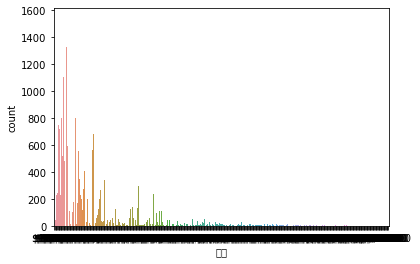

In [28]:
sns.countplot(x='价格',data=df, palette='hls')
plt.show()
# plt.savefig('count_plot')

In [30]:
df.groupby('价格').mean()

,ID
价格,
"$1,000.00",2.020000e+13
"$1,050.00",2.020000e+13
"$1,065.00",2.020000e+13
"$1,067.00",2.020000e+13
"$1,100.00",2.020000e+13
...,...
$988.00,2.020000e+13
$99.00,2.020000e+13
$995.00,2.020000e+13


In [ ]:
grouped = df.groupby(by='风向')
grouped['PM2.5'].agg('mean')
# .reset_index()

In [ ]:
import matplotlib.cm as cm
plt.figure(figsize=(20,10))

# groupby 与zip 的典型用法
def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = kobe.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):    
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, alpha=alpha)

# shot_zone_area
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

# shot_zone_basic
plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')

# shot_zone_range
plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_range')

In [ ]:

groups = df_pm25.groupby(pd.Grouper(freq='1Y'))['pm25']
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values

years

In [3]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
for name,group in tips.groupby(tips['sex']):
    print(name)
    print(group)

Male
     total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns]
Female
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female  

In [8]:
## 聚合函数
def get_range(x):
    return x.max()-x.min()
tips_range = tips.groupby('sex')['tip'].agg(get_range)
tips_range

sex
Male      9.0
Female    5.5
Name: tip, dtype: float64

In [9]:
tips.groupby(['sex','smoker'])['tip'].agg(['mean','std',get_range])
# tips.groupby(['sex','smoker'])['tip'].agg([('tip_mean','mean'),('Range',get_range)])  # 命名

mean       std  get_range
sex    smoker                               
Male   Yes     3.051167  1.500120       9.00
       No      3.113402  1.489559       7.75
Female Yes     2.931515  1.219916       5.50
       No      2.773519  1.128425       4.20

In [10]:
tips.groupby(['sex','smoker'])['tip'].agg([('tip_mean','mean'),('Range',get_range)])

tip_mean  Range
sex    smoker                 
Male   Yes     3.051167   9.00
       No      3.113402   7.75
Female Yes     2.931515   5.50
       No      2.773519   4.20

In [11]:
tips.groupby(['day','time'])['total_bill','tip'].agg([('tip_mean','mean'),('Range',get_range)])

<ipython-input-11-d2a9ed5f4cc2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tips.groupby(['day','time'])['total_bill','tip'].agg([('tip_mean','mean'),('Range',get_range)])


total_bill              tip      
              tip_mean  Range  tip_mean Range
day  time                                    
Thur Lunch   17.664754  35.60  2.767705  5.45
     Dinner  18.780000   0.00  3.000000  0.00
Fri  Lunch   12.845714   7.69  2.382857  1.90
     Dinner  19.663333  34.42  2.940000  3.73
Sat  Lunch         NaN    NaN       NaN   NaN
     Dinner  20.441379  47.74  2.993103  9.00
Sun  Lunch         NaN    NaN       NaN   NaN
     Dinner  21.410000  40.92  3.255132  5.49

###  分组运算

In [12]:
def top(x,n=5):
    return x.sort_values(by='tip',ascending=False)[-n:]

In [13]:
tips.groupby('sex').apply(top)

total_bill   tip     sex smoker  day    time  size
sex                                                           
Male   43         9.68  1.32    Male     No  Sun  Dinner     2
       235       10.07  1.25    Male     No  Sat  Dinner     2
       75        10.51  1.25    Male     No  Sat  Dinner     2
       237       32.83  1.17    Male    Yes  Sat  Dinner     2
       236       12.60  1.00    Male    Yes  Sat  Dinner     2
Female 215       12.90  1.10  Female    Yes  Sat  Dinner     2
       0         16.99  1.01  Female     No  Sun  Dinner     2
       111        7.25  1.00  Female     No  Sat  Dinner     1
       67         3.07  1.00  Female    Yes  Sat  Dinner     1
       92         5.75  1.00  Female    Yes  Fri  Dinner     2

In [14]:
f = lambda x: x.fillna(x.mean())
df.groupby('sex').apply(f)

NameError: name 'df' is not defined

### 统计bool个数

In [ ]:
print('True个数：',np.sum(df!=0))
print('True个数：',np.sum(df!=1))

# 绘图

## matplotlib

### 样式设置

In [ ]:
linestyle='--' #设置线型
linewidth=5  # 设置线宽
color='r'  # 设置颜色
marker='.' # 设置点标记
alpha=0.8  # 设置透明度
plt.plot(years,gdp,linestyle='--',linewidth=5)

### 基础设置

In [ ]:
plt.figure(figsize=(10,6))  #设置图片大小

plt.xlabel('Country')  #设置X轴标签
plt.ylabel('Count')  #设置Y轴标签

plt.xticks(range(len(labels)),labels,fontsize=12) #设置刻度和刻度标签

plt.bar(np.arange(len(data1)),data1,width=width,label='one')   #设置图例
plt.bar(np.arange(len(data2))+width,data2,width=width,label='two')
plt.legend()

plt.savefig('cs')  # 保存

Text(0.5, 1.0, '案例')

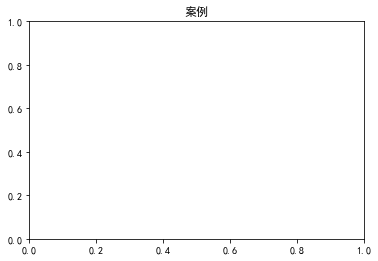

In [8]:
plt.rcParams['font.sans-serif'] = ['simhei'] #指定默认字体
plt.rcParams['axes.unicode_minus'] = False   #解决保存图像是负号'-'显示为方块的问题
plt.title('案例')

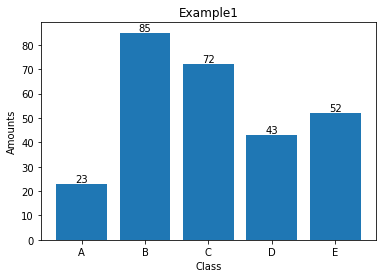

In [7]:
data = [23, 85, 72, 43, 52]
labels = ['A','B','C','D','E']
plt.xticks(range(len(data)),labels) #设置刻度和标签
plt.xlabel('Class')
plt.ylabel('Amounts')
plt.title('Example1')
plt.bar(range(len(data)),data)
for x,y in zip(range(len(data)),data):
    plt.text(x, y,y, ha='center', va= 'bottom')  #文本注解

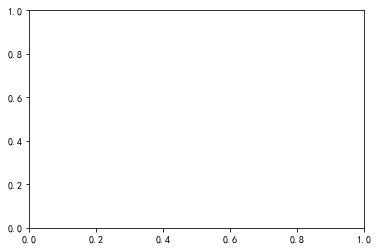

In [9]:
fig, ax = plt.subplots()

fig,ax = plt.subplots()等价于：

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

fig, ax = plt.subplots(1,3),其中参数1和3分别代表子图的行数和列数，一共有 1x3 个子图像。函数返回一个figure图像和子图ax的array列表。
fig, ax = plt.subplots(1,3,1),最后一个参数1代表第一个子图。

如果想要设置子图的宽度和高度可以在函数内加入figsize值
fig, ax = plt.subplots(1,3,figsize=(15,7))，这样就会有1行3个15x7大小的子图。

### 图表布局

<BarContainer object of 7 artists>

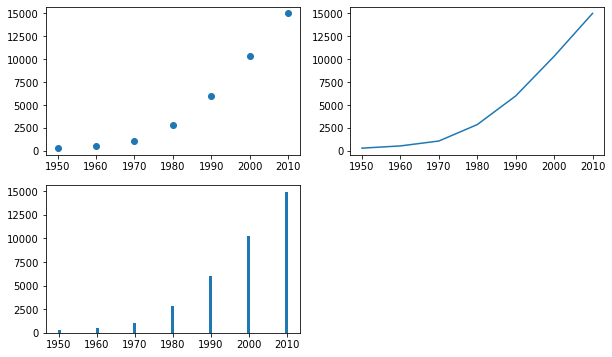

In [6]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
ax1.scatter(years,gdp)
ax2.plot(years,gdp)
ax3.bar(years,gdp)

### 图标类型

#### 饼图

In [ ]:
labels=['精细化管理','可能沙尘传输']
X=[np.sum(df2!=0),np.sum(df2==0)]  

fig = plt.figure()
plt.pie(X,labels=labels,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Pie chart")

plt.show() 

#### 折线图

In [ ]:
x_data = df['时间']
y_data = df['PM2.5/PM10']
y_data2 = 0.8

plt.plot(x_data,y_data)
#plt.plot(x_data,y_data2,color='red',linewidth=3.0,linestyle='-.')
plt.show()

#### 散点图

In [2]:
x = df['PM2.5']
y = df['PM10']

plt.scatter(x, y)
plt.show()

NameError: name 'df' is not defined

#### 柱状图

<BarContainer object of 5 artists>

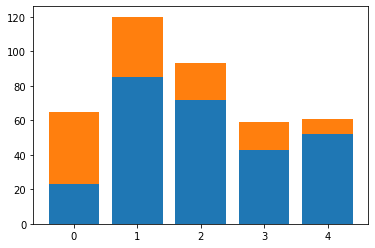

In [5]:
data = [23, 85, 72, 43, 52]
data1 = [23, 85, 72, 43, 52]
data2 = [42, 35, 21, 16, 9]
plt.bar(range(len(data)),data1)
plt.bar(range(len(data)),data2,bottom=data1)

#### 直方图

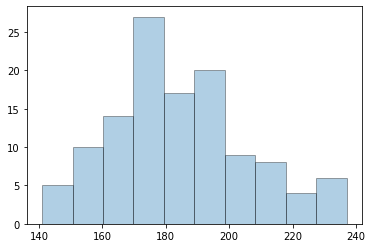

In [5]:
x = [141, 159, 166, 172, 177, 182, 188, 196, 203, 214,
     143, 160, 167, 173, 177, 183, 189, 196, 203, 215,
     144, 160, 168, 173, 178, 184, 189, 196, 205, 218,
     149, 161, 168, 174, 178, 185, 189, 196, 206, 223,
     150, 161, 168, 174, 178, 186, 190, 196, 207, 225,
     152, 162, 170, 174, 179, 186, 190, 197, 208, 226,
     153, 163, 171, 175, 179, 187, 191, 197, 209, 228,
     153, 163, 171, 175, 179, 187, 192, 198, 210, 233,
     154, 164, 172, 175, 180, 187, 194, 198, 210, 233,
     155, 165, 172, 175, 180, 187, 194, 200, 211, 234,
     156, 165, 172, 176, 181, 188, 195, 201, 211, 234,
     158, 165, 172, 176, 182, 188, 195, 202, 213, 237]

plt.hist(x, edgecolor='k', alpha=0.35) # 设置直方边线颜色为黑色，不透明度为 0.35
plt.show()

#### 箱线图

In [11]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0, 5)
plt.show()

#### 聚合图

In [ ]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(players[['height', 'weight', 'skintone']], alpha=0.2, diagonal='hist', ax=ax);

#### 风玫瑰图

In [13]:
# 读取数据
pm25W = pd.read_excel('E:\windrose\weatherAll1(3).xlsx')
#加载字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)


def ShowAndSave_WindroseAxes(pm25W0,iname):
    ax = windrose.WindroseAxes.from_ax()
    ax.bar(pm25W0.wind_x, 
           pm25W0.wind_s, 
           nsector=16, # 散片个数
           bins=[0,0.2,1.5,3.3,5.4,7.9,10.7,13.8,17.1], # 分段列表
           #bins=1, # 分段个数
           normed=True, opening=1, edgecolor='white')    
    ax.set_legend() #图例
    #ax.legend(loc=(-0.2,0.9)) #图例位置
    ax.legend(loc=(-0.12,0.8)) #图例位置    
    ax.set_title(iname,fontproperties=font) #标题    
    savefig('./' + iname + '.png')

pm25W1 = pm25W[pm25W.name == '巨轮']
ShowAndSave_WindroseAxes(pm25W1,'巨轮')

## seaborn

### 基础设置

5种风格
darkgrid
whitegrid
dark
white
ticks

In [27]:
sns.set_style("dark")  # 风格设置
# 5种风格 darkgrid   whitegrid   dark    white  ticks

color_palette()    # 颜色设置
# * l-亮度 lightness 
# * s-饱和 saturation
# current_palette = sns.color_palette("dark")
# 6个默认的颜色循环主题： deep, muted, pastel, bright, dark, colorblind



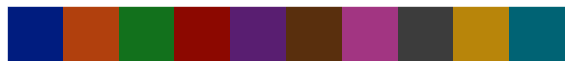

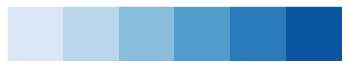

In [29]:
current_palette = sns.color_palette("dark")
sns.palplot(current_palette)
sns.palplot(sns.color_palette("Blues"))# 连续色板

### 图标类型

#### 直方图

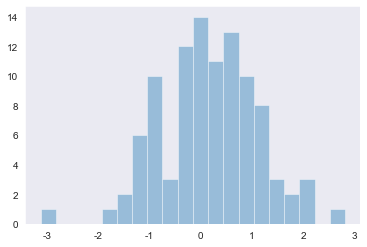

In [34]:
x = np.random.normal(size=100)
sns.distplot(x, bins=20, kde=False)

#### 散点图

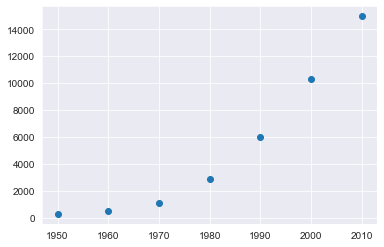

In [40]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

sns.set_style("darkgrid")
plt.scatter(years, gdp)

#### 组合散点图

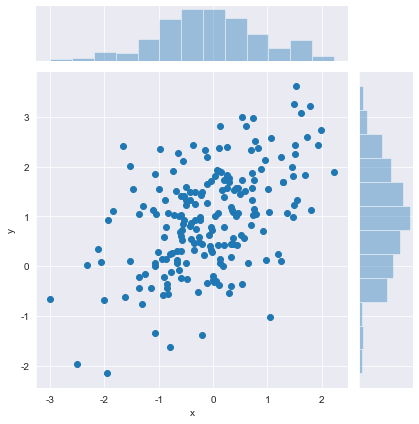

In [41]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
# df
sns.jointplot(x="x", y="y", data=df);

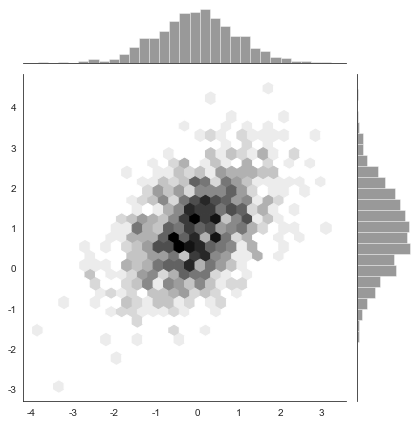

In [42]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

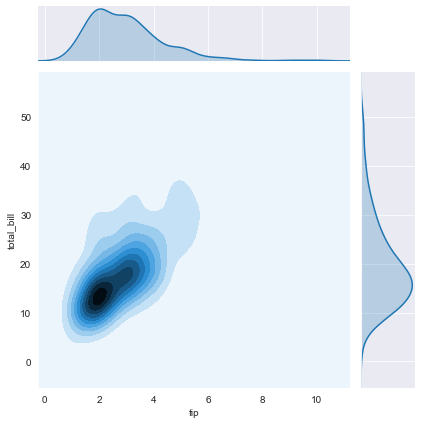

In [49]:
tips=sns.load_dataset('tips')
sns.jointplot(x="tip", y="total_bill", data=tips,kind = 'kde')

#### 关系图

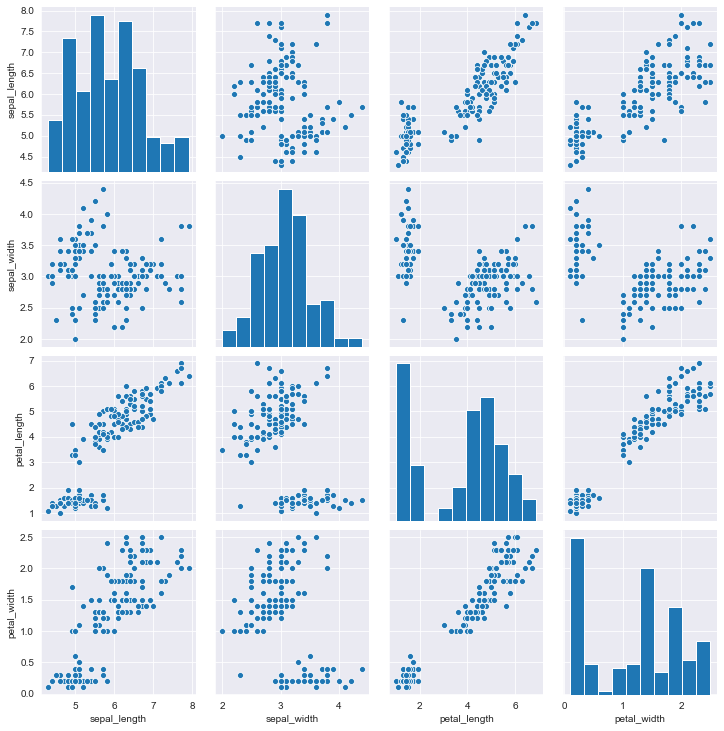

In [44]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

#### 分类图（多变量）

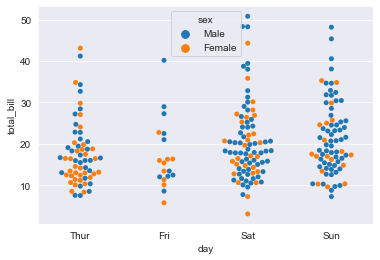

In [50]:
sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips)

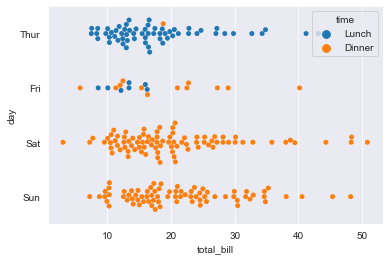

In [51]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

#### 盒图（小提琴图）

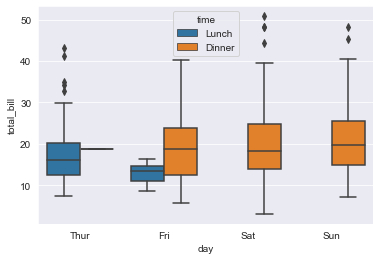

In [52]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

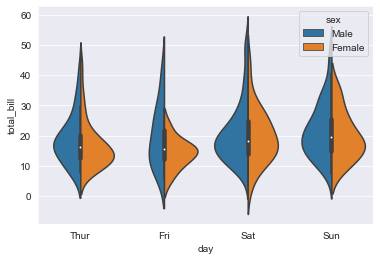

In [53]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

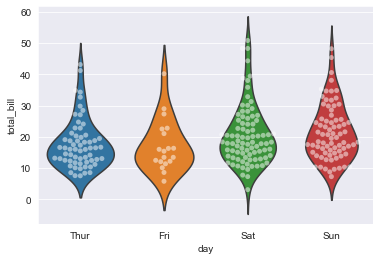

In [54]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)

#### 条形图

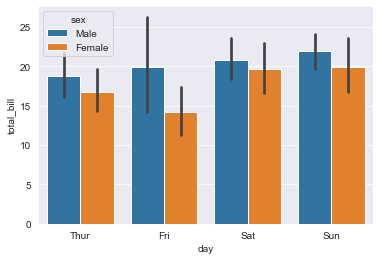

In [58]:
sns.barplot(x="day", y="total_bill", data=tips,hue = 'sex')

#### 点图

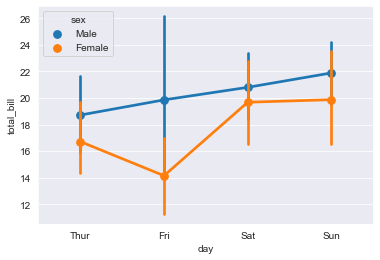

In [67]:
sns.pointplot(x="day", y="total_bill", data=tips,hue = 'sex')

#### 宽图

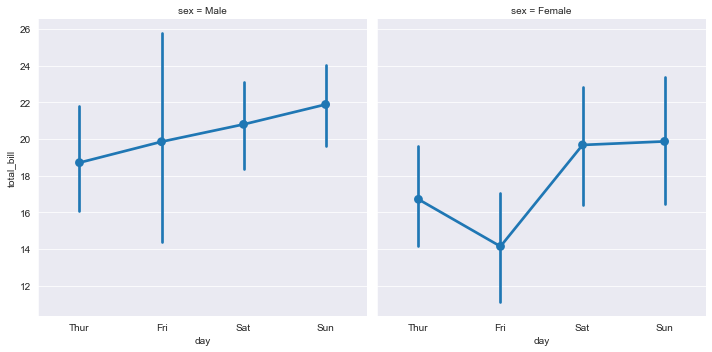

In [64]:
sns.factorplot(x="day", y="total_bill", data=tips,col = 'sex')

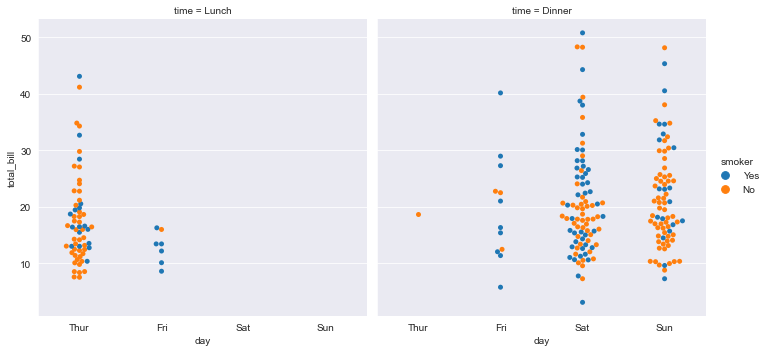

In [65]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm")

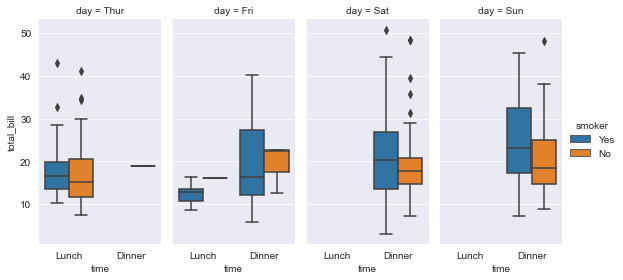

In [66]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5)

#### 热力图

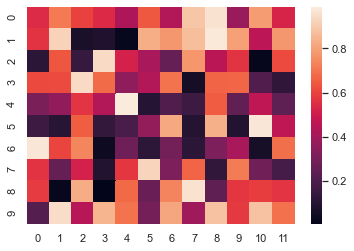

In [71]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [ ]:
#相关性查看
corrMatrix=BikeDf.corr()

#将相关系数矩阵可视化
mask=np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatrix,mask=mask,vmax=0.8,square=True,annot=True,)

#### QQ图

In [ ]:
stats.probplot(BikeDf["count"], dist='norm', fit=True, plot=ax[0][1])

## 时间序列

### 取当前时间

In [73]:
from datetime import datetime
dt = str(int(datetime.now().strftime('%Y')))+'年'+str(int(datetime.now().strftime('%m')))+'月'+str(int(datetime.now().strftime('%d')))+'日'
dt

'2021年5月14日'

### 将字符串时间格式转为时间戳

In [ ]:
# 将字符串时间格式转为时间戳
day_ = all_data.date.apply(str)
time_ = all_data.hour.apply(str)
# a = all_data.date.apply(str)+all_data.hour.apply(str)
#  2016-01-01 00:00:00
day_ = day_.apply(lambda x:x[:4])+"-"+day_.apply(lambda x:x[4:6])+"-"+day_.apply(lambda x:x[6:])
time_ = time_+":00:00"
time_ = day_+" "+time_
time_ = pd.to_datetime(time_)
day_ = pd.to_datetime(day_)
all_data["time"] = time_
all_data['day'] = day_
all_data

In [3]:
## 使用to_datetime
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
print(df)
df = pd.to_datetime(df)
df

   year  month  day
0  2015      2    4
1  2016      3    5


0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

# 待整理

In [ ]:
data = []
name = []

for file_name in os.listdir(trian_path):
    file_path = os.path.join(trian_path, file_name)
    name.append(file_name.split('.')[0])
    d = np.genfromtxt(file_path, delimiter=',', dtype=float) 
    data.append(abs(d.transpose()))

In [ ]:
for i, d in enumerate(data): ## 枚举


In [3]:
seq = ['one', 'two', 'three']
for i, element in enumerate(seq):
    print (i, element)

0 one
1 two
2 three


In [ ]:
    stations = set(meo_dataset['station_id'])

    meo_stations = {}
    print(meo_dataset["station_id"])
    for station in stations:
        meo_station = meo_dataset[meo_dataset["station_id"] == station].copy()
        meo_station.drop("station_id", axis=1, inplace=True)

        # rename
        original_names = meo_station.columns.values.tolist()
        names_dict = {original_name: station + "_" + original_name for original_name in original_names}
        meo_station.rename(index=str, columns=names_dict, inplace=True)
        meo_station.drop_duplicates(inplace=True)
        meo_stations[station] = meo_station
    # print(aq_station.shape)

    # for station in stations :
    # 	print(aq_stations[station].shape)

    # merge data of different stations into one df
    meo_stations_merged = pd.concat(list(meo_stations.values()), axis=1)